<a href="https://colab.research.google.com/github/jpbarragan99/mushroom_classification/blob/main/Mushroom_classificator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mushroom Classificator

In this proyect we are going to use a ML model to sort mushroom pictures into 2 classes, edible and poisonous. I followed Nicholas Renotte's guide for this machine learning model, all credit goes to them on that regard.

This model takes images and can classify them as long as it's a binary choice (happy or sad, red or blue, edible or poisonous).

The guide: https://www.youtube.com/watch?v=jztwpsIzEGc

For fun we will also throw the iconic red mushroom form the Super Mario Bros series.

## 1. Set Up

Let's start by importing the necessary libraries

In [2]:
import tensorflow as tf
import os

In [3]:
import cv2
import imghdr

In [4]:
import numpy as np
from matplotlib import pyplot as plt

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [6]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [7]:
import cv2

# 2. Loading and Cleaning the Data

First I compiled some pictures to train the model, but we need to make sure the folders are clean and only use the recognised image file formats (jpeg, jpg,png, etc).

The model will have 2 classes "edible" and "poison".

We will also set GPU Memory consumption growth to avoid OOM errors following the advice given by Nicholas.

In [8]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [9]:
data_dir = '/content/drive/MyDrive/data'

image_exts = ['jpeg','jpg', 'bmp', 'png']

In [10]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [11]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/data')

Found 422 files belonging to 2 classes.


In [12]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

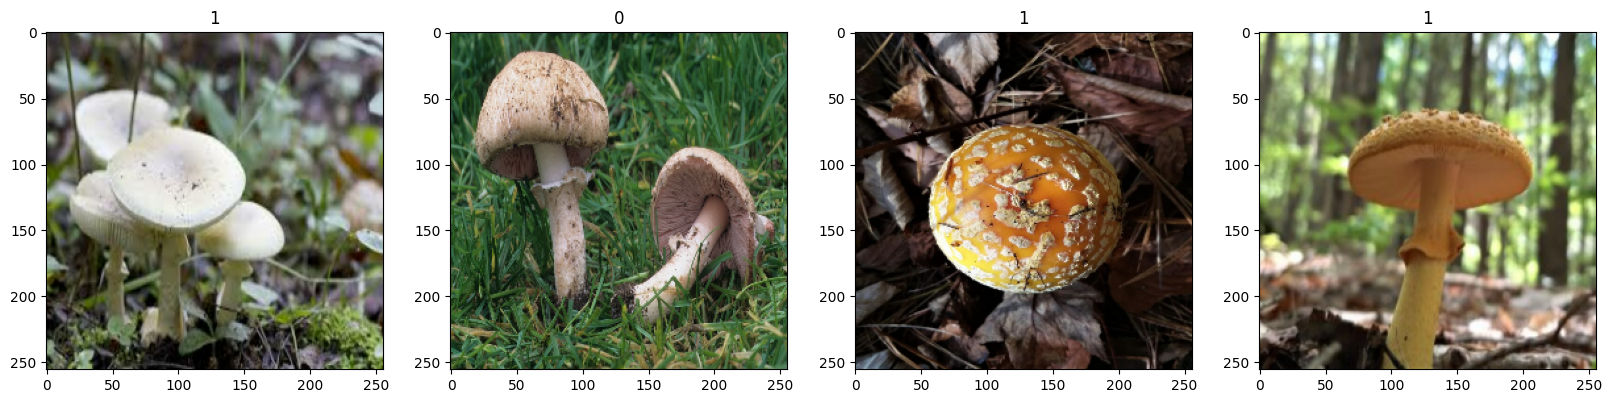

In [13]:
fig, ax = plt.subplots(ncols = 4, figsize = (20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

Class 1 is poisonous and 0 es edible


# 3. Training the model



In [14]:
data = data.map(lambda x,y: (x/255, y))

data.as_numpy_iterator().next()

(array([[[[4.53215957e-01, 5.80728233e-01, 2.71874040e-01],
          [4.80154723e-01, 6.23475790e-01, 3.13886344e-01],
          [4.21244532e-01, 5.86679041e-01, 2.74795115e-01],
          ...,
          [1.60280719e-01, 3.22702199e-01, 1.46864951e-01],
          [1.60251513e-01, 3.27608466e-01, 1.38047636e-01],
          [3.63601968e-02, 1.96183264e-01, 2.29137950e-02]],
 
         [[3.03725302e-01, 4.53518987e-01, 1.36660352e-01],
          [4.17065442e-01, 5.79982400e-01, 2.65025169e-01],
          [3.45832378e-01, 5.27675033e-01, 2.10150510e-01],
          ...,
          [1.26040235e-01, 2.99672097e-01, 1.41726509e-01],
          [1.34645477e-01, 3.10889632e-01, 1.42715514e-01],
          [9.61545482e-02, 2.77290136e-01, 1.02643423e-01]],
 
         [[2.11073935e-01, 3.95227760e-01, 6.74124956e-02],
          [4.00550038e-01, 5.89051008e-01, 2.65307128e-01],
          [4.04720545e-01, 5.96999943e-01, 2.78600842e-01],
          ...,
          [1.63544059e-01, 3.35068166e-01, 2.2846

In [15]:
len(data)

14

In [16]:
train_per = int(len(data)*.7)+1
val_per = int(len(data)*.2)+1
test_per = int(len(data)*.1)

train_per + val_per + test_per

14

In [17]:
train = data.take(train_per)
validation = data.take(val_per)
test = data.take(test_per)

In [18]:
len(test)

1

In [19]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [20]:
model = Sequential()

In [21]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [22]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [24]:
logdir = 'logs'

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

hist = model.fit(train, epochs=20, validation_data=validation, callbacks=[tensorboard_callback])

Epoch 1/20
10/10 [==============================] - 15s 218ms/step - loss: 0.8126 - accuracy: 0.5875 - val_loss: 0.6577 - val_accuracy: 0.8021
Epoch 2/20
10/10 [==============================] - 5s 371ms/step - loss: 0.6218 - accuracy: 0.7000 - val_loss: 0.5375 - val_accuracy: 0.7917
Epoch 3/20
10/10 [==============================] - 5s 409ms/step - loss: 0.4825 - accuracy: 0.7812 - val_loss: 0.3896 - val_accuracy: 0.8854
Epoch 4/20
10/10 [==============================] - 5s 366ms/step - loss: 0.3128 - accuracy: 0.8844 - val_loss: 0.1989 - val_accuracy: 0.9375
Epoch 5/20
10/10 [==============================] - 3s 243ms/step - loss: 0.1589 - accuracy: 0.9500 - val_loss: 0.2064 - val_accuracy: 0.8958
Epoch 6/20
10/10 [==============================] - 7s 477ms/step - loss: 0.1704 - accuracy: 0.9406 - val_loss: 0.1305 - val_accuracy: 0.9479
Epoch 7/20
10/10 [==============================] - 5s 369ms/step - loss: 0.1209 - accuracy: 0.9563 - val_loss: 0.1231 - val_accuracy: 0.9688
Epoch

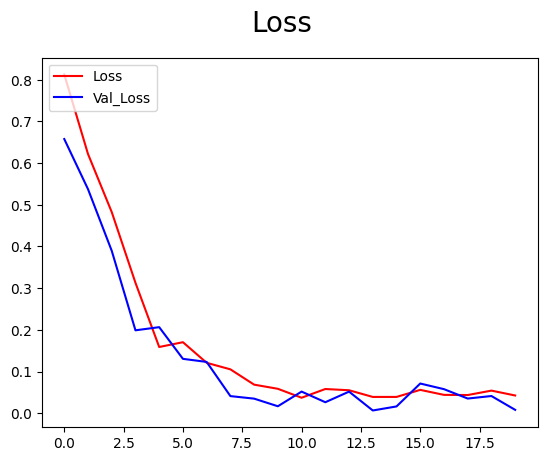

In [25]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'red', label = 'Loss')
plt.plot(hist.history['val_loss'], color = 'blue', label = 'Val_Loss')
fig.suptitle('Loss', fontsize = 20)
plt.legend(loc = "upper left")
plt.show()

The graph shows us that this model isn't overfitted since we can see the curve go down.

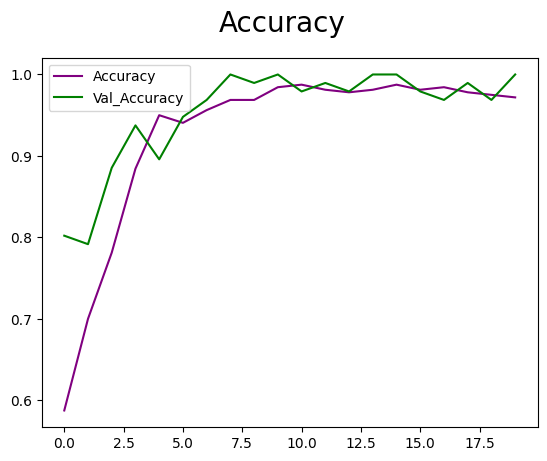

In [26]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color = 'purple', label = 'Accuracy')
plt.plot(hist.history['val_accuracy'], color = 'green', label = 'Val_Accuracy')
fig.suptitle('Accuracy', fontsize = 20)
plt.legend(loc = "upper left")
plt.show()

In [27]:
pre = Precision()

re = Recall()

acc = BinaryAccuracy()

In [28]:
for batch in test.as_numpy_iterator():
  X, y = batch
  yhat = model.predict(X)
  pre.update_state(y, yhat)
  re.update_state(y, yhat)
  acc.update_state(y, yhat)

1/1 [==============================] - 0s 173ms/step


In [29]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.9375, shape=(), dtype=float32) tf.Tensor(0.96875, shape=(), dtype=float32)


# 4. Testing the Model

For this test we will use:


*   Amanita phalloides this mushroom accounts for the majority of fatal mushroom poisonings worldwide.
*   Laetiporus or Chicken of the Woods an edible mushroom that is used as a vegetarian replacement for chicken.
*   The iconic red mushroom from Mario just to see what pops up.




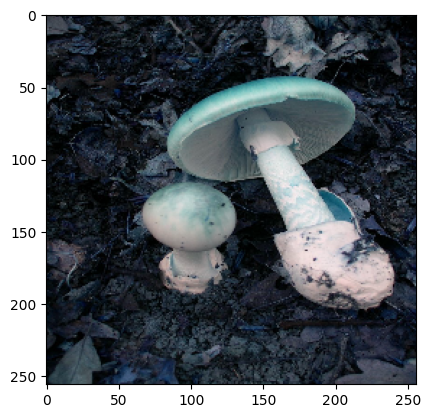

In [30]:
img = cv2.imread('/content/drive/MyDrive/test/p-test.JPG')
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [31]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

if yhat > 0.5:
  print (f'Predicted class is Poisonous')
else:
  print (f'Predicted class is Edible')

1/1 [==============================] - 0s 176ms/step
Predicted class is Poisonous


The model correctly classified this as a poisonous mushroom.

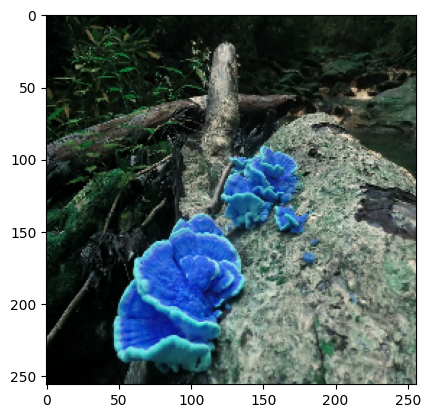

In [32]:
img2 = cv2.imread('/content/drive/MyDrive/test/e-test.JPG')
resize = tf.image.resize(img2, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [34]:
yhat2 = model.predict(np.expand_dims(resize/255, 0))
yhat2

if yhat2 > 0.5:
  print (f'Predicted class is Poisonous')
else:
  print (f'Predicted class is Edible')

1/1 [==============================] - 0s 70ms/step
Predicted class is Edible


It's also correct, so we can asume that on must cases the model will correctly sort mushrooms out. I say must cases since a lot of mushrooms can be extremely tricky to identify, but for a small side project, I am pretty comfortable with the results.

To finish things off we will input the red mushroom from Mario and see what happens.

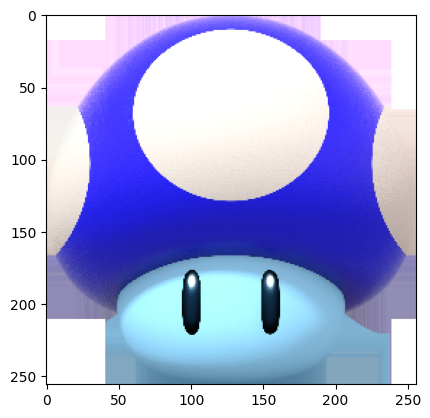

1/1 [==============================] - 0s 25ms/step
Predicted class is Poisonous


In [38]:
img3 = cv2.imread('/content/drive/MyDrive/test/SMP_Dash_Mushroom.png')
resize = tf.image.resize(img3, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()
yhat3 = model.predict(np.expand_dims(resize/255, 0))
yhat3

if yhat3 > 0.5:
  print (f'Predicted class is Poisonous')
else:
  print (f'Predicted class is Edible')

Better let Mario know that those mushrooms are not edible, maybe he's been building some resistance to them since he's been eating them for a long time.